Theory: Multiple regression is a machine learning algorithm to predict a dependent variable with two or more predictors. Multiple regression has numerous real-world applications in three problem domains: examining relationships between variables, making numerical predictions and time series forecasting.

Importing Files

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
# from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

impportiong dataset

In [ ]:
housing = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [ ]:
print("The number of rows and colums are {} and also called shape of the matrix".format(housing.shape))
print("Columns names are \n {}".format(housing.columns))

The number of rows and colums are (17000, 9) and also called shape of the matrix
Columns names are 
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


In [ ]:
print(housing.head())

   longitude  latitude  ...  median_income  median_house_value
0    -114.31     34.19  ...         1.4936             66900.0
1    -114.47     34.40  ...         1.8200             80100.0
2    -114.56     33.69  ...         1.6509             85700.0
3    -114.57     33.64  ...         3.1917             73400.0
4    -114.57     33.57  ...         1.9250             65500.0

[5 rows x 9 columns]


In [ ]:
print(housing.tail())

       longitude  latitude  ...  median_income  median_house_value
16995    -124.26     40.58  ...         2.3571            111400.0
16996    -124.27     40.69  ...         2.5179             79000.0
16997    -124.30     41.84  ...         3.0313            103600.0
16998    -124.30     41.80  ...         1.9797             85800.0
16999    -124.35     40.54  ...         3.0147             94600.0

[5 rows x 9 columns]


In [ ]:
print(housing.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object


<Figure size 432x288 with 0 Axes>

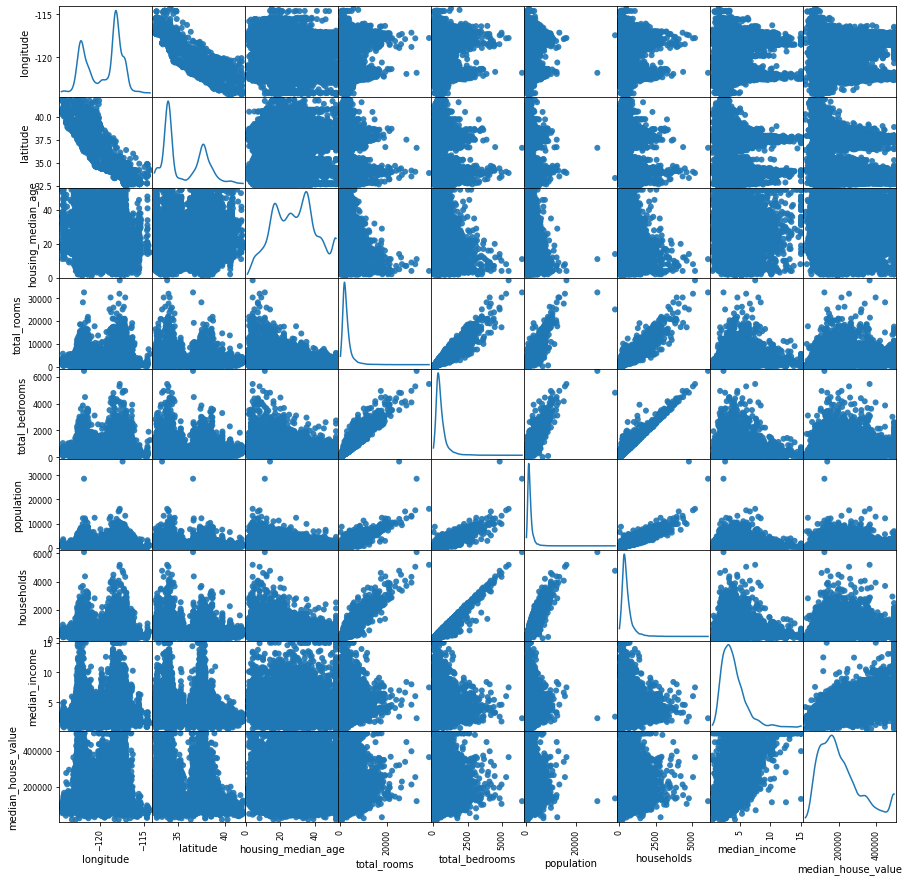

In [ ]:
fig = plt.figure()
scatter_matrix(housing,figsize =(15,15),alpha=0.9,diagonal="kde",marker="o");

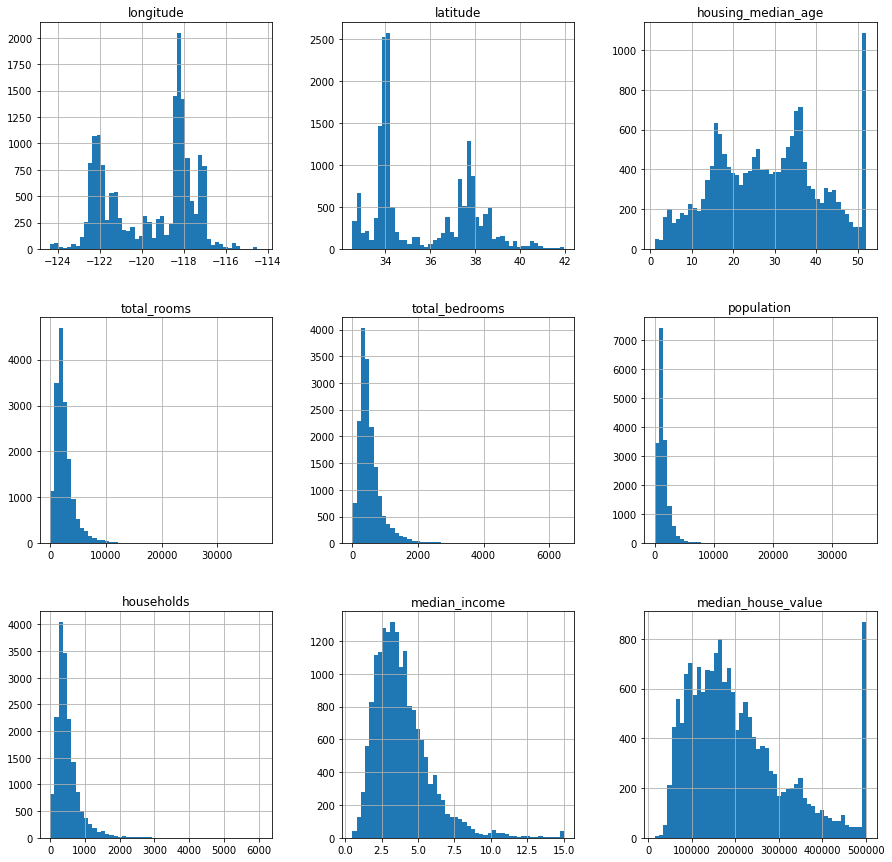

In [ ]:
housing.hist(figsize=(15,15),bins=50);

In [ ]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [ ]:
print ("Total_bedrooms column Mode is  "+str(housing["total_bedrooms"].mode())+"\n")
print(housing["total_bedrooms"].describe())

Total_bedrooms column Mode is  0    280.0
dtype: float64

count    17000.000000
mean       539.410824
std        421.499452
min          1.000000
25%        297.000000
50%        434.000000
75%        648.250000
max       6445.000000
Name: total_bedrooms, dtype: float64


In [ ]:
housing_ind = housing.drop("median_house_value",axis=1)
print(housing_ind.head())
housing_dep = housing["median_house_value"]
print("Medain Housing Values")
print(housing_dep.head())

   longitude  latitude  ...  households  median_income
0    -114.31     34.19  ...       472.0         1.4936
1    -114.47     34.40  ...       463.0         1.8200
2    -114.56     33.69  ...       117.0         1.6509
3    -114.57     33.64  ...       226.0         3.1917
4    -114.57     33.57  ...       262.0         1.9250

[5 rows x 8 columns]
Medain Housing Values
0    66900.0
1    80100.0
2    85700.0
3    73400.0
4    65500.0
Name: median_house_value, dtype: float64


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(housing_ind,housing_dep,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)

(13600, 8)
(13600,)


In [ ]:
#initantiate the linear regression
linearRegModel = LinearRegression(n_jobs=-1)
#fit the model to the training data (learn the coefficients)
linearRegModel.fit(X_train,y_train)
#print the intercept and coefficients 
print("Intercept is "+str(linearRegModel.intercept_))
print("coefficients  is "+str(linearRegModel.coef_))

Intercept is -3652253.1348448903
coefficients  is [-4.34652477e+04 -4.31063044e+04  1.13172438e+03 -8.84326062e+00
  1.13707973e+02 -3.56570769e+01  4.51475550e+01  4.01947263e+04]


In [ ]:
y_pred = linearRegModel.predict(X_test)

In [ ]:
print(len(y_pred))
print(len(y_test))
print(y_pred[0:5])
print(y_test[0:5])

3400
3400
[143770.39502963 398615.57056493  86341.10306742 148534.35353345
 147202.29808602]
10941    142700.0
5250     500001.0
10292     61800.0
2266     162800.0
6398      90600.0
Name: median_house_value, dtype: float64


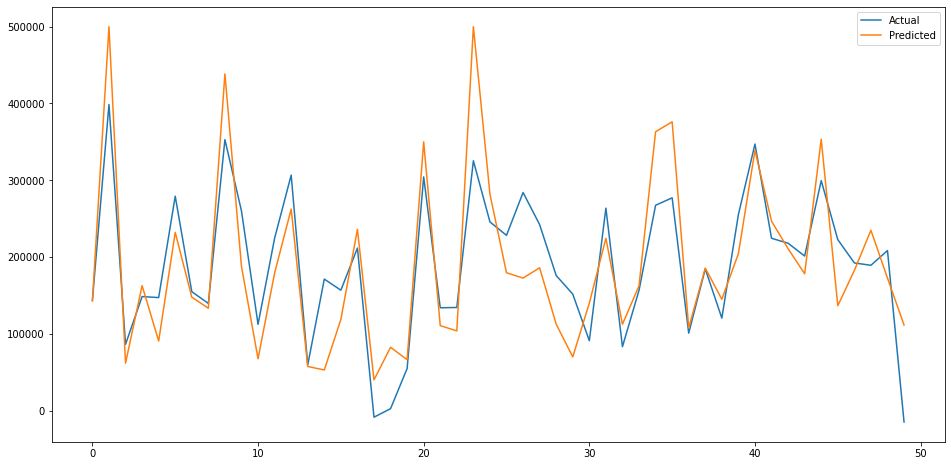

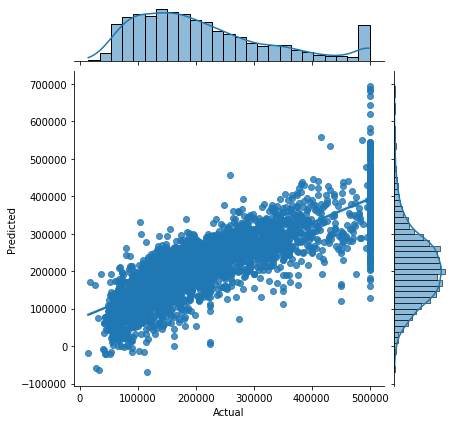

In [ ]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);